# **SALES ANALYSIS**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# Importation of Raw Data

In [8]:
df = pd.read_csv('/content/sales.csv')

# Meta Data of raw Data

In [9]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [10]:
print("The meta data of the data is as follows:", df.shape)
print("The Raws of the data is :", df.shape[0])
print("The Columns of the data is :", df.shape[1])

The meta data of the data is as follows: (13014, 12)
The Raws of the data is : 13014
The Columns of the data is : 12


In [11]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13014 entries, 0 to 13013
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           13014 non-null  int64  
 1   order_id           13014 non-null  int64  
 2   pizza_name_id      13014 non-null  object 
 3   quantity           13014 non-null  int64  
 4   order_date         13014 non-null  object 
 5   order_time         13014 non-null  object 
 6   unit_price         13014 non-null  float64
 7   total_price        13014 non-null  float64
 8   pizza_size         13014 non-null  object 
 9   pizza_category     13014 non-null  object 
 10  pizza_ingredients  13014 non-null  object 
 11  pizza_name         13013 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.2+ MB


# ***Types of the data in our dataset***

In [13]:
df.dtypes

,0
pizza_id,int64
order_id,int64
pizza_name_id,object
quantity,int64
order_date,object
order_time,object
unit_price,float64
total_price,float64
pizza_size,object
pizza_category,object


In [14]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,13014.000000,13014.000000,13014.000000,13014.000000,13014.000000
mean,6507.500000,2862.860458,1.018595,16.484786,16.791924
std,3756.962536,1644.930608,0.139573,3.638293,4.386810
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,3254.250000,1442.000000,1.000000,12.500000,12.750000
50%,6507.500000,2881.000000,1.000000,16.500000,16.500000
75%,9760.750000,4273.750000,1.000000,20.250000,20.500000
max,13014.000000,5710.000000,4.000000,35.950000,62.250000


# Key performance indicators **(KPI)**

In [15]:
total_revenue = df['total_price'].sum()
total_pizza_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()
average_order_value = total_revenue / total_orders
avg_pizza_per_order = total_pizza_sold / total_orders

print(f'The total revenue : ${total_revenue:.2f}')
print(f'The total pizza sold : {total_pizza_sold}')
print(f'The total orders : {total_orders}')
print(f'The average order value : ${average_order_value:.2f}')
print(f'The average pizza per order : {avg_pizza_per_order:.2f}')

The total revenue : $218530.10
The total pizza sold : 13256
The total orders : 5710
The average order value : $38.27
The average pizza per order : 2.32


# Charts


# *Ingredient analysis*

In [16]:
ingredient = (
    df['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns ={'index' : 'Count', 'pizza_ingredients':'ingredients'} )
)


print(ingredient)

           ingredients  count
0               Garlic   7375
1             Tomatoes   7130
2           Red Onions   5180
3          Red Peppers   4388
4    Mozzarella Cheese   2829
..                 ...    ...
60   Brie Carre Cheese    130
61          Prosciutto    130
62  Caramelized Onions    130
63               Pears    130
64               Thyme    130

[65 rows x 2 columns]


# *Daily Trend - Total Orders*

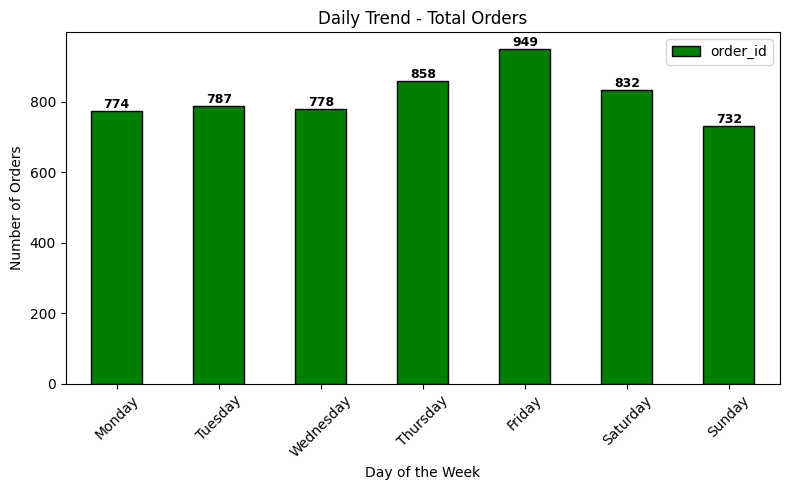

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

order_by_day = df.groupby('day_name', observed=False)['order_id'].nunique().reset_index()

ax = order_by_day.plot(kind='bar', x='day_name', y='order_id', figsize=(8, 5),
                       color='green', edgecolor='black')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.title('Daily Trend - Total Orders')

for i, val in enumerate(order_by_day['order_id']):
    plt.text(i, val, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


# *Daily Trend - Total revenue*

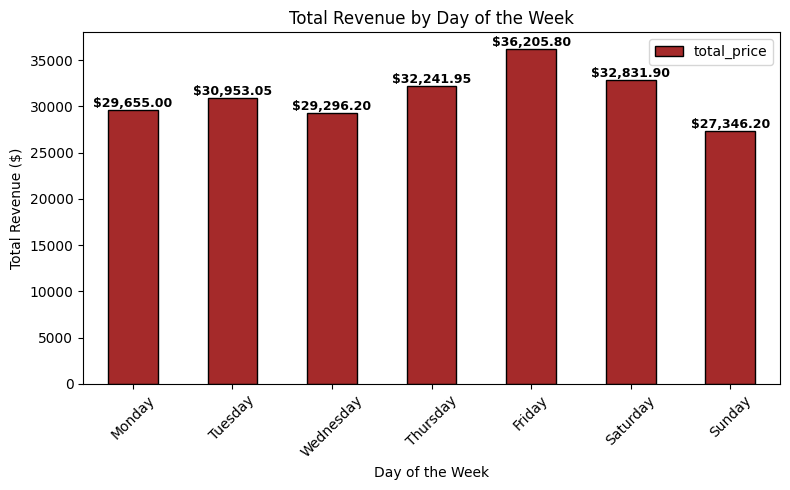

In [18]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

order_by_day = df.groupby('day_name', observed=False)['total_price'].sum().reset_index()

ax = order_by_day.plot(
    kind='bar',
    x='day_name',
    y='total_price',
    figsize=(8, 5),
    color='brown',
    edgecolor='black'
)

plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.title('Total Revenue by Day of the Week')

for i, val in enumerate(order_by_day['total_price']):
    plt.text(
        i,
        val,
        f'${val:,.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


# *Hourly Trend - Total Orders*

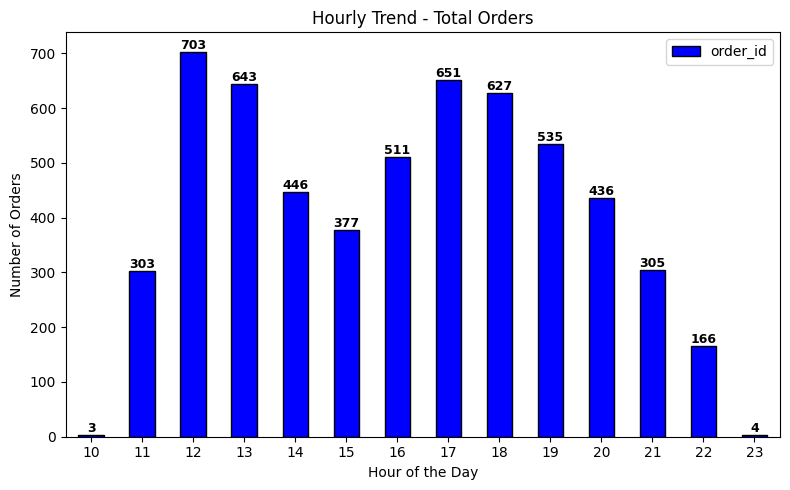

In [19]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('hour', observed=False)['order_id'].nunique().reset_index()

ax = orders_by_hour.plot(
    kind='bar',
    x='hour',
    y='order_id',
    figsize=(8, 5),
    color='blue',
    edgecolor='black'
)

plt.title('Hourly Trend - Total Orders')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour['order_id']):
    plt.text(i, val, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


# *Monthly Trend - Total Orders*

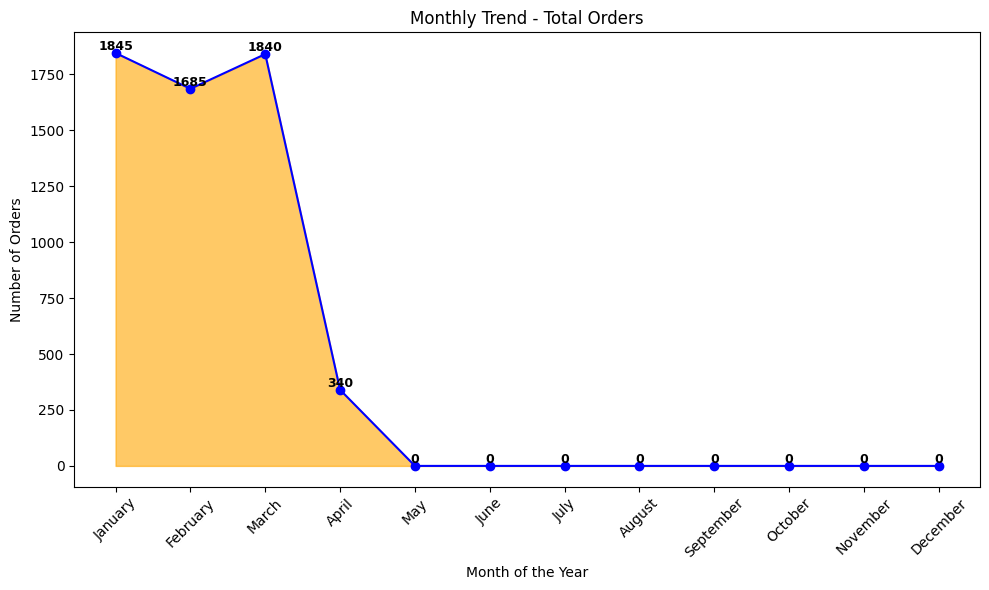

In [20]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

df['month_name'] = df['order_date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique().reset_index()

plt.figure(figsize=(10, 6))
plt.fill_between(orders_by_month['month_name'], orders_by_month['order_id'],
                 color='orange', alpha=0.6)
plt.plot(orders_by_month['month_name'], orders_by_month['order_id'],
         marker='o', linestyle='-', color='blue')

plt.xlabel('Month of the Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.title('Monthly Trend - Total Orders')

for i, val in enumerate(orders_by_month['order_id']):
    plt.text(i, val, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


# *% of Sales by Category*

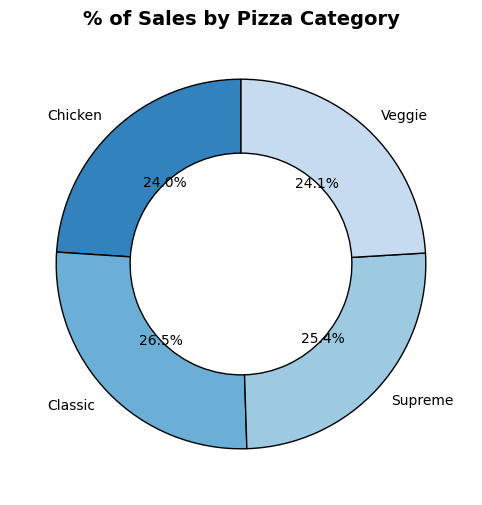

In [21]:
category_sales = df.groupby('pizza_category')['total_price'].sum().reset_index()

category_sales['percentage'] = (category_sales['total_price'] / category_sales['total_price'].sum()) * 100

colors = plt.get_cmap('tab20c').colors
plt.figure(figsize=(8, 6))
plt.pie(
    category_sales['total_price'],
    labels=category_sales['pizza_category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'width': 0.4}
)
plt.title('% of Sales by Pizza Category', fontsize=14, fontweight='bold')

plt.show()


# *% Sales by Pizza size & Category*

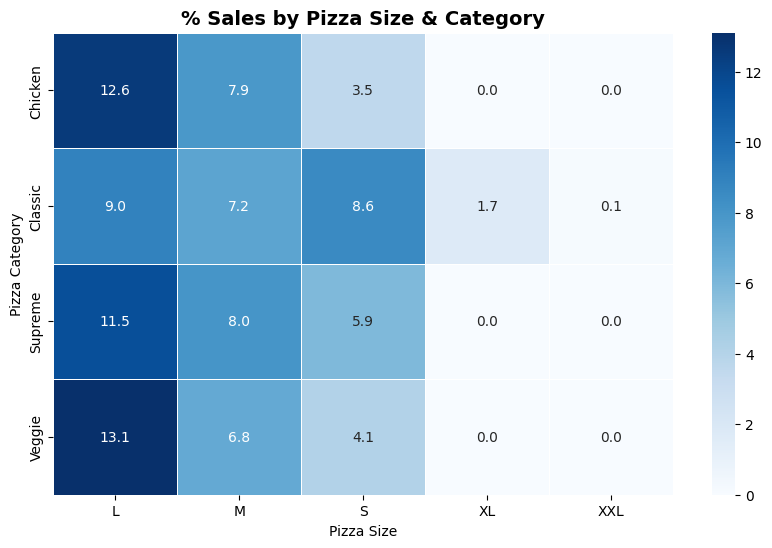

In [23]:
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value = 0
)

sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize=(10, 6))
sns.heatmap(sales_pct, annot=True, cmap='Blues', fmt='.1f', linewidths=.5)
plt.title('% Sales by Pizza Size & Category', fontsize=14, fontweight='bold')
plt.xlabel('Pizza Size')
plt.ylabel('Pizza Category')
plt.show()

# *Total Pizza Sold by Pizza Category*

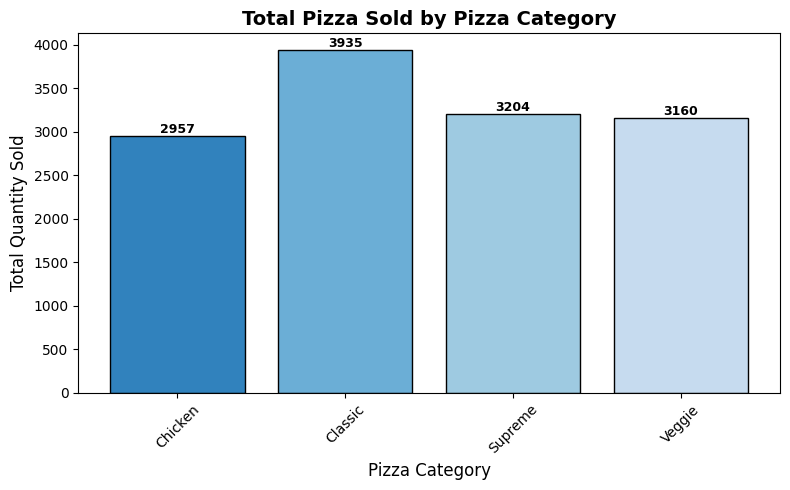

In [28]:
pizza_by_category = df.groupby('pizza_category')['quantity'].sum().reset_index()

colors = list(plt.get_cmap('tab20c').colors)
colors = colors[:len(pizza_by_category)]

plt.figure(figsize=(8, 5))
bars = plt.bar(
    pizza_by_category['pizza_category'],
    pizza_by_category['quantity'],
    color=colors,
    edgecolor='black'
)

plt.title('Total Pizza Sold by Pizza Category', fontsize=14, fontweight='bold')
plt.xlabel('Pizza Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval,
        str(pizza_by_category['quantity'][i]),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


# *Top 5 Best Selling Pizzas - Total Orders*

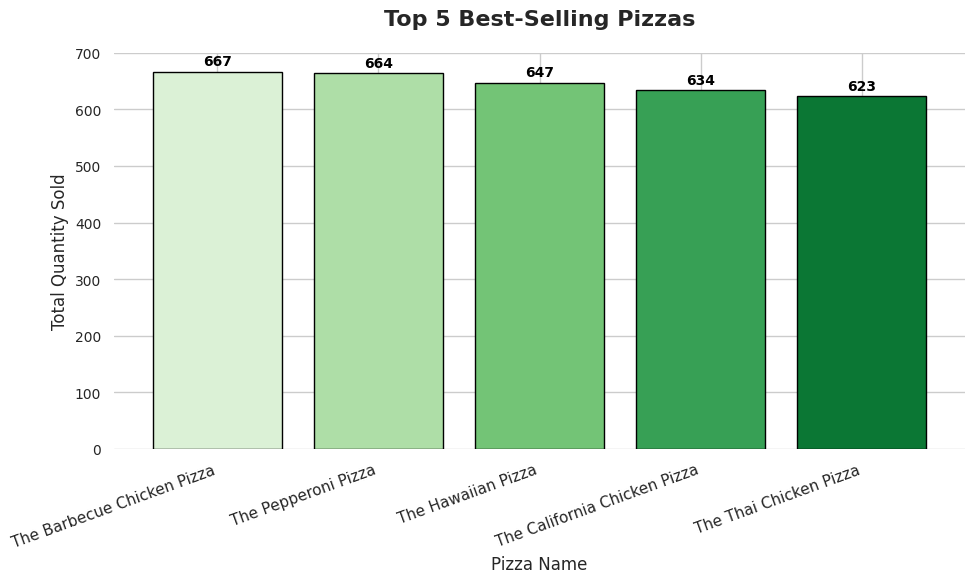

In [36]:
pizza_by_name = df.groupby('pizza_name')['quantity'].sum().reset_index()
top_5_best_selling = pizza_by_name.sort_values(by='quantity', ascending=False).head(5)

sns.set(style='whitegrid')

colors = sns.color_palette("Greens", n_colors=5)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_5_best_selling['pizza_name'],
    top_5_best_selling['quantity'],
    color=colors,
    edgecolor='black',
    linewidth=1
)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + max(top_5_best_selling['quantity'])*0.01,
        f"{yval:,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title('Top 5 Best-Selling Pizzas', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=20, ha='right', fontsize=11)
plt.yticks(fontsize=10)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


# *Top 5 Best Selling Pizza - Total Orders*

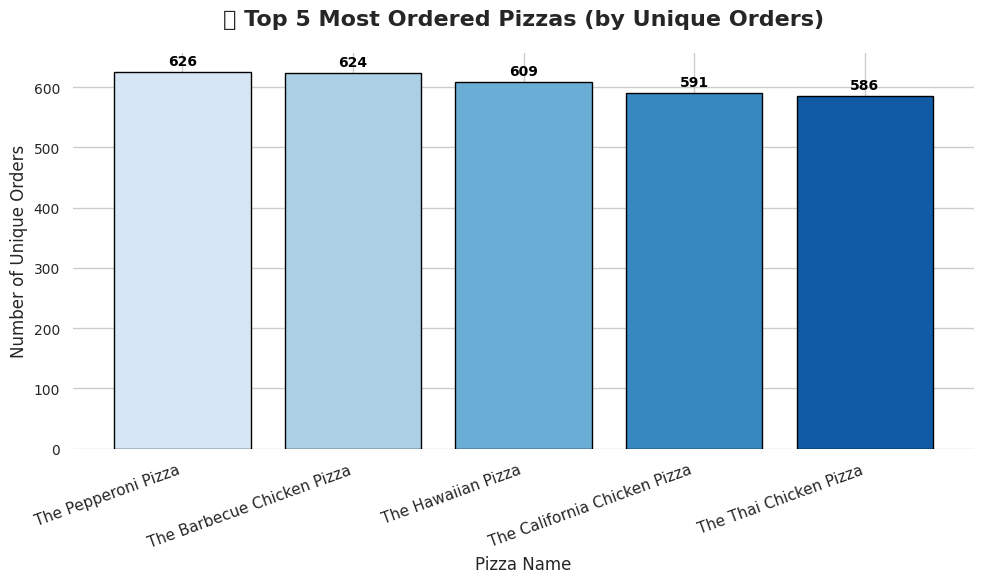

In [38]:
pizza_by_name = df.groupby('pizza_name')['order_id'].nunique().reset_index(name='unique_orders')

top_5_best_selling = pizza_by_name.sort_values(by='unique_orders', ascending=False).head(5)

sns.set(style='whitegrid')

colors = sns.color_palette("Blues", n_colors=5)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_5_best_selling['pizza_name'],
    top_5_best_selling['unique_orders'],
    color=colors,
    edgecolor='black',
    linewidth=1
)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + max(top_5_best_selling['unique_orders'])*0.01,
        f"{yval:,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title('Top 5 Most Ordered Pizzas (by Unique Orders)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Number of Unique Orders', fontsize=12)
plt.xticks(rotation=20, ha='right', fontsize=11)
plt.yticks(fontsize=10)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


# *Top 5 Best Selling Pizza - Total Sales*

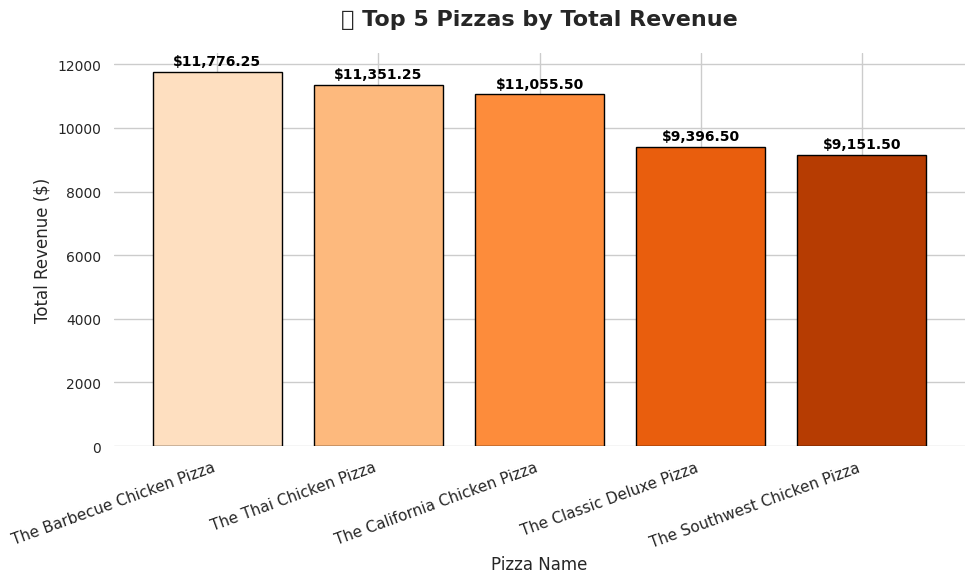

In [39]:
pizza_by_name = df.groupby('pizza_name')['total_price'].sum().reset_index(name='total_revenue')

top_5_best_selling = pizza_by_name.sort_values(by='total_revenue', ascending=False).head(5)

sns.set(style='whitegrid')

colors = sns.color_palette("Oranges", n_colors=5)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    top_5_best_selling['pizza_name'],
    top_5_best_selling['total_revenue'],
    color=colors,
    edgecolor='black',
    linewidth=1
)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + max(top_5_best_selling['total_revenue'])*0.01,
        f"${yval:,.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title('Top 5 Pizzas by Total Revenue', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=20, ha='right', fontsize=11)
plt.yticks(fontsize=10)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


# *Bottom 5 Best Selling Pizzas - Total Orders*

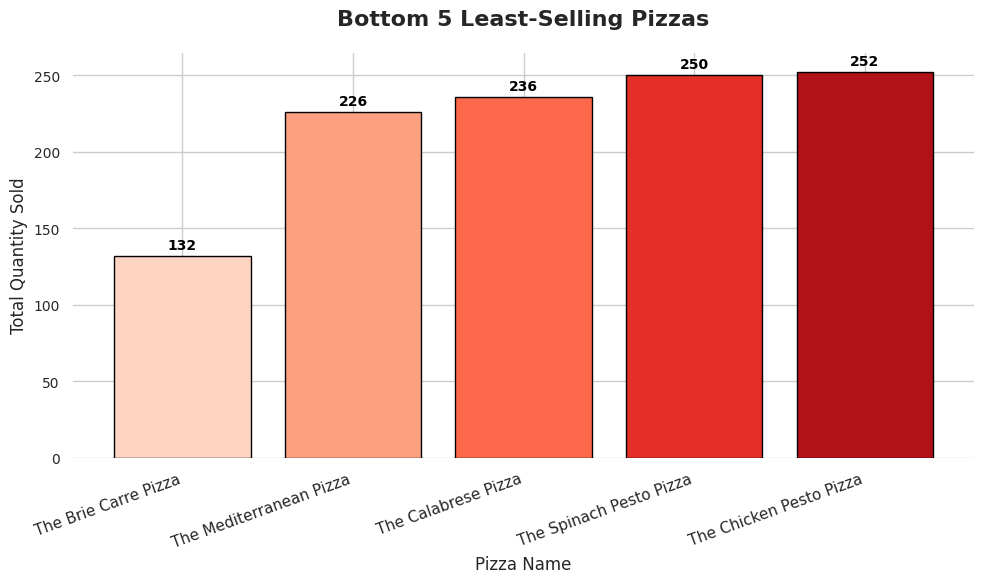

In [41]:
pizza_by_name = df.groupby('pizza_name')['quantity'].sum().reset_index()

bottom_5_selling = pizza_by_name.sort_values(by='quantity', ascending=True).head(5)

sns.set(style='whitegrid')

colors = sns.color_palette("Reds", n_colors=5)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    bottom_5_selling['pizza_name'],
    bottom_5_selling['quantity'],
    color=colors,
    edgecolor='black',
    linewidth=1
)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + max(bottom_5_selling['quantity'])*0.01,
        f"{yval:,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title('Bottom 5 Least-Selling Pizzas', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=20, ha='right', fontsize=11)
plt.yticks(fontsize=10)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


# *Bottom 5 Best Selling Pizza - Total Sales*

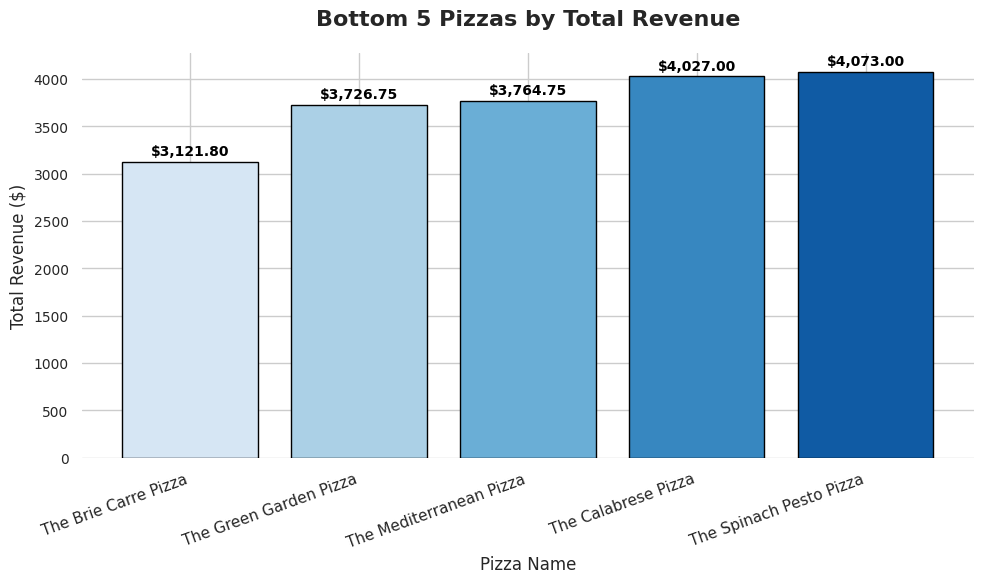

In [42]:
pizza_by_name = df.groupby('pizza_name')['total_price'].sum().reset_index(name='total_revenue')

bottom_5_revenue = pizza_by_name.sort_values(by='total_revenue', ascending=True).head(5)

sns.set(style='whitegrid')

colors = sns.color_palette("Blues", n_colors=5)

plt.figure(figsize=(10, 6))
bars = plt.bar(
    bottom_5_revenue['pizza_name'],
    bottom_5_revenue['total_revenue'],
    color=colors,
    edgecolor='black',
    linewidth=1
)

for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + max(bottom_5_revenue['total_revenue'])*0.01,
        f"${yval:,.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.title('Bottom 5 Pizzas by Total Revenue', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=20, ha='right', fontsize=11)
plt.yticks(fontsize=10)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()
